In [1]:
# importación de liberías necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [2]:
from google.colab import files
import io
import json
import numpy as np
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/result.csv')

In [4]:
df

,color,fuelTypeId,fuelType,id,km,make,makeId,model,modelId,price,...,year,brand,brand_id,fuel_types,model_id,seller_type,bodyType,cubicCapacity,doors,hp
0,COMMON.COLOR_WHITE,2,Gasolina,51040978,41080,TOYOTA,46,Yaris,322.0,10990,...,2015,TOYOTA,46,Gasolina,322.0,profesional,BODY_TYPE_SEDAN,1329.0,5.0,99.0
1,COMMON.COLOR_BLACK,1,Diesel,50914675,78576,VOLVO,48,V40,285.0,17450,...,2016,VOLVO,48,Diesel,285.0,profesional,BODY_TYPE_SEDAN,1969.0,5.0,120.0
2,COMMON.COLOR_BLACK,1,Diesel,50573084,99999,BMW,7,Serie 3,70.0,20999,...,2015,BMW,7,Diesel,70.0,particular,BODY_TYPE_FAMILIAR,1995.0,5.0,184.0
3,COMMON.COLOR_BROWN,4,Hibrido,51265506,79000,FORD,15,Mondeo,39.0,19990,...,2016,FORD,15,Hibrido,39.0,profesional,BODY_TYPE_SEDAN,1999.0,4.0,187.0
4,COMMON.COLOR_WHITE,1,Diesel,50433156,105000,MERCEDES-BENZ,28,Clase C,8.0,31900,...,2016,MERCEDES-BENZ,28,Diesel,8.0,particular,BODY_TYPE_SEDAN,2143.0,4.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,COMMON.COLOR_GRAY,1,Diesel,51304363,182000,PORSCHE,34,Cayenne,503.0,26500,...,2010,PORSCHE,34,Diesel,503.0,profesional,BODY_TYPE_4X4,2967.0,5.0,240.0
3033,COMMON.COLOR_GRAY,1,Diesel,51053592,99000,PORSCHE,34,Macan,1097.0,49990,...,2017,PORSCHE,34,Diesel,1097.0,profesional,BODY_TYPE_4X4,2967.0,5.0,258.0
3034,COMMON.COLOR_WHITE,2,Gasolina,50921778,59900,PORSCHE,34,Macan,1097.0,50900,...,2014,PORSCHE,34,Gasolina,1097.0,profesional,BODY_TYPE_4X4,2997.0,5.0,340.0
3035,COMMON.COLOR_WHITE,1,Diesel,50667722,99999,PORSCHE,34,Macan,1097.0,51900,...,2016,PORSCHE,34,Diesel,1097.0,profesional,BODY_TYPE_4X4,2967.0,5.0,258.0


In [5]:
df = df.dropna()

In [6]:
df = df.drop(['id','provinceId', 'brand_id', 'model_id', 'color', 'fuelType', 'make', 'model', 'province', 'title', 'transmissionType', 'brand', 'fuel_types', 'seller_type', 'bodyType'], axis=1)

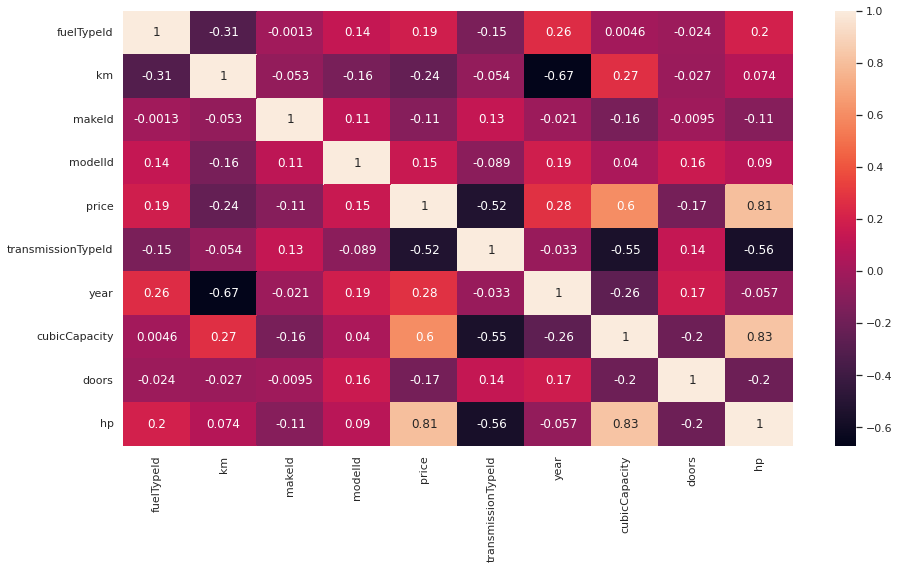

In [7]:
# mostrar un mapa de calor que indique la correlación entre variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True)

In [8]:
# separar datos entre datos y etiquetas(resultados)
x_df = df.drop('price', axis=1)
y_df = df['price']
# separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 1, test_size=0.25)
df.head()

,fuelTypeId,km,makeId,modelId,price,transmissionTypeId,year,cubicCapacity,doors,hp
0,2,41080,46,322.0,10990,2.0,2015,1329.0,5.0,99.0
1,1,78576,48,285.0,17450,2.0,2016,1969.0,5.0,120.0
2,1,99999,7,70.0,20999,1.0,2015,1995.0,5.0,184.0
3,4,79000,15,39.0,19990,1.0,2016,1999.0,4.0,187.0
4,1,105000,28,8.0,31900,1.0,2016,2143.0,4.0,170.0


In [9]:
#Parametros
k = 3
w = 'uniform'
# elegir, instanciar y entrenar el modelo
model = KNeighborsClassifier(k, weights=w)
#model.fit(x_train, y_train)

def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
    # obtengo cada partición
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]
    # entrenamiento
    model.fit(x_train_fold, y_train_fold)
    # predicción
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo
    acc = accuracy_score(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [10]:
kf = KFold(n_splits = 5)
lista = []
validacion_cruzada_cl(model, x_df, y_df, kf)

0.011261023799325667

In [11]:
y_predict = model.predict(x_test)

In [12]:
# error cuadratico medio
mean_squared_error(y_predict, y_test)

167231865.42649007

In [13]:
# error absoluto medio
mean_absolute_error(y_predict, y_test)

6635.119205298013

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


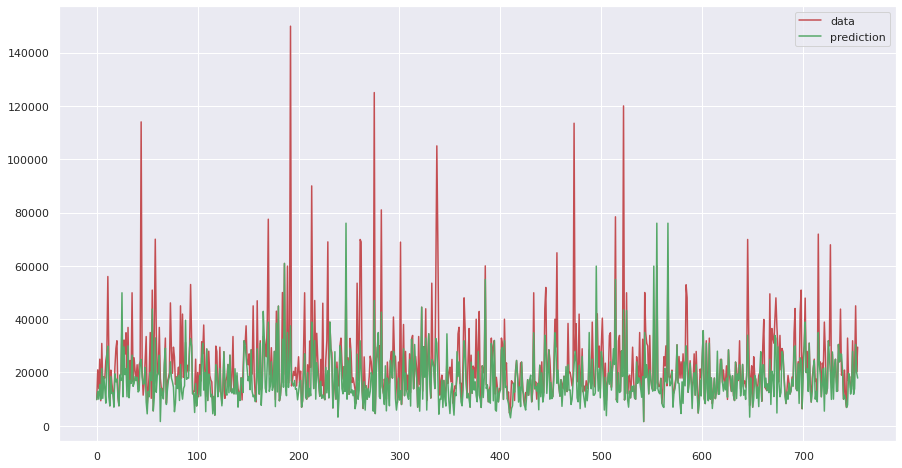

In [14]:
# representacion grafica
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_predict, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

In [16]:
import joblib
joblib.dump(model, "modelo3.joblib")

['modelo3.joblib']